# Plan de Trabajo Proyecto Final

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.


A continuación se realizará una exploración inicial de los datos. Presentando al final del notebook:

- Una lista de preguntas aclaratorias.
- Un plan aproximado para resolver la tarea.



## Análisis Exploratorio de Datos

### Inicialización y carga de datos

Empezamos importando las librerías necesarias para realizar una exploración inicial de los datos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

Continuamos cargando los cuatro archivos que presentan la información recopilada de cada usuario, para esto utilizaremos la función `read_csv` de pandas. 

In [2]:
try:
    contract = pd.read_csv('datasets/final_provider/contract.csv')
    internet = pd.read_csv('datasets/final_provider/internet.csv')
    personal = pd.read_csv('datasets/final_provider/personal.csv')
    phone = pd.read_csv('datasets/final_provider/phone.csv')

except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

Ahora realizaremos un análisis exploratorio inicial de nuestros cuatro conjuntos de datos, para esto utilizaremos el atributo `shape`, los métodos `head` e `info`. Posteriormente comprobaremos la presencia de valores ausentes y duplicados con los métodos `isna` y `duplicated`. Finalmente, trazaremos gráficos de barras para las variables categóricas e histogramas para las variables numéricas o continuas. 

### Dataset `contract`

In [3]:
# Número de filas y columnas
contract.shape

(7043, 8)

In [4]:
# Imprimimos las cinco primeras filas del dataset
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
# Revisamos la información correspondiente
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [6]:
print(f'''Número de valores ausentes: 
{contract.isna().sum()}''')

Número de valores ausentes: 
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [7]:
print(f'Número de valores duplicados: {contract.duplicated().sum()}')

Número de valores duplicados: 0


El dataset `contract` cuenta con 8 columnas y 7043 filas, cada fila corresponde a un usuario, así que contamos con la información de un total de 7043 usuarios en Interconnect. Podemos observar que el tipo de dato para las columnas `BeginDate` y `MonthlyCharges` no es el correcto y requieren ser transformados a los tipos correctos, tanto datetime como float. En la columna `EndDate` se observan datos de tipo fecha y string, en primer lugar, será necesario generar una nueva variable categórica que guarde la información de si un cliente canceló o no su cuenta y, en segundo lugar, se deberá reemplazar los valores `No` con una fecha determinada y convertir la columna en tipo datetime. 

Vamos a transformar la variable `TotalCharges` a formato float para observar la distribución de valores a través del método describe e histrogramas de frecuencia. 

In [8]:
# Transformamos a tipo float y llamamos al método describe
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Comprobamos si se generaron valores ausentes
contract.isna().sum()

customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

Al cambiar el tipo de dato de cargos totales, se generaron valores ausentes, los cuales serán procesados posteriormente. 

In [9]:
# Llamamos al método describe
contract.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


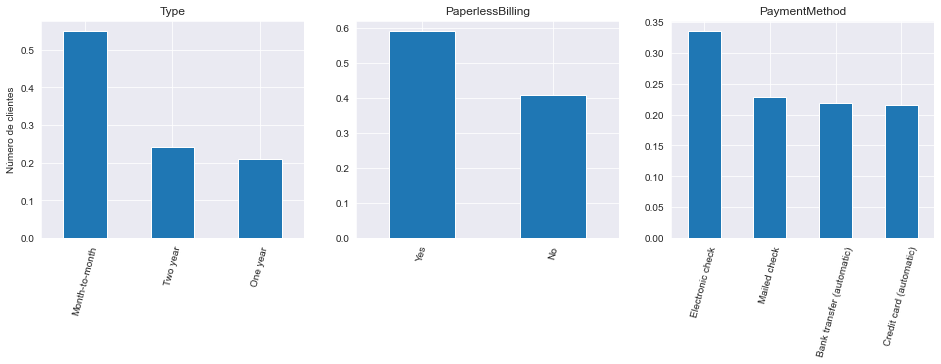

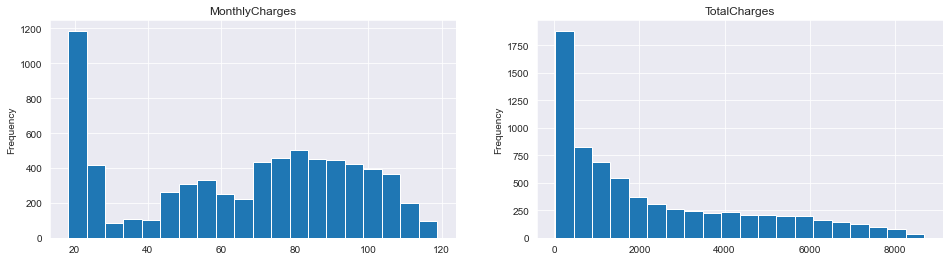

In [10]:
# Trazamos gráficos de barras para las variables categóricas
fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].set_ylabel('Número de clientes')

for idx, col in enumerate(['Type', 'PaperlessBilling', 'PaymentMethod']):
    contract[col].value_counts(normalize=True).plot(kind='bar', ax=ax[idx], title=col, rot=75)

# Trazamos histogramas para las variables numéricas
fig, ax = plt.subplots(1, 2, figsize=(16,4))

for idx, col in enumerate(['MonthlyCharges', 'TotalCharges']):
    contract[col].plot(kind='hist', ax=ax[idx], title=col, bins=20)

Más del 50% de usuarios prefieren realizar pagos mensuales y menos del 20% firman contratos anuales. Por otro lado, cerca del 60% optan por una facturación sin papel y el 35% prefiere una facturación electrónica frente a transferencias bancarias, envío de facturas por correo o tarjetas de crédito. 

En el caso de los cargos mensuales, podemos observar que cerca de 1200 clientes pagan la tarifa mínima de servicios y se presenta una proporción similar, de aproximadamente 400 clientes, que llegan a pagar tarifas mensuales entre los 70 a 100 dólares. El promedio de pago mensual es de 64.76, valor inferior a la mediana, por lo que nuestros datos presentan una asimetría negativa o un sesgo hacia la izquierda, a pesar de que esto no se ve reflejado en el histograma de frecuencias. 

Para los cargos totales, se puede determinar una asimetría positiva, con una media superior a la mediana. Esto se corrobora al analizar nuestro histograma, con el pico más alto de cerca de 1800 clientes, a los cuales se les llegó a cobrar entre 18 hasta 500 dólares totales. A su vez, se observan algunos valores atípicos de frecuencias bajas a partir de los 7000 dólares. 

A continuación, analizaremos el período de tiempo que abarcan nuestros datos. 

In [11]:
print('Fecha mínima de incio de contrato:', contract['BeginDate'].min())
print('Fecha máxima de incio de contrato:', contract['BeginDate'].max())

Fecha mínima de incio de contrato: 2013-10-01
Fecha máxima de incio de contrato: 2020-02-01


La fecha mínima registrada es del año 2013 y la máxima del 2020, así que contamos con la información de un período de siete años. 

**Observaciones Generales**

- Cambiar el tipo de datos de columnas con datos de fechas y cargos totales.
- Procesar ausentes generados al transformar el tipo de datos. 
- Arreglar artefactos encontrados en la columna con fecha de cancelación de la cuenta, a partir de la cual se determinará el objetivo de nuestro modelo de machine learning. 

### Dataset `personal`

In [12]:
# Número de filas y columnas
personal.shape

(7043, 5)

In [13]:
# Imprimimos las cinco primeras filas del dataset
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
# Revisamos información general de los datos
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
print(f'''Número de valores ausentes:
{personal.isna().sum()}''')

Número de valores ausentes:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


In [16]:
print(f'Número de valores duplicados: {personal.duplicated().sum()}')

Número de valores duplicados: 0


El dataset `personal` contiene información personal de cada uno de los 7043 clientes, relacionada con su género `gender`, si se encuentra jubilado o no `SeniorCitizen`, si tiene pareja o no `Partner`, y si tiene dependientes o no `Dependents`. El tipo de datos es correcto, y no se registran valores ausentes o duplicados que requieran ser procesados. 

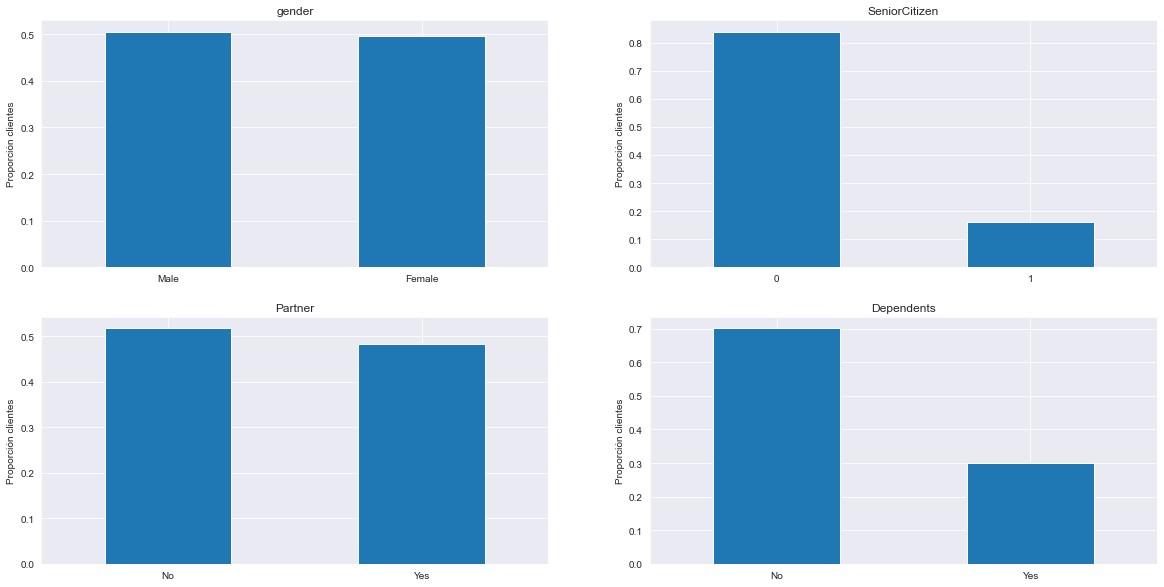

In [17]:
# Trazamos gráficos de barras para cada variable categórica. 
fig = plt.subplots(figsize=(20, 10))

for n, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents']):
    ax = plt.subplot(2, 2, n + 1)
    ax.set_ylabel('Proporción clientes')
    personal[col].value_counts(normalize=True).plot(kind='bar', ax=ax, title=col, rot=0)

plt.show()

Existe una proporción similar de hombres y mujeres, con un porcentaje ligeramente superior de hombres. En cuanto al número de clientes jubilados, se registra un porcentaje inferior al 20%. Por otro lado, el número de clientes sin pareja es superior a aquellos usuarios con pareja. Finalmente, cerca del 70% de clientes no presentan dependientes. 

**Observaciones Generales**

- Unificar a un solo estilo el título de cada columna. 
- No se requiere rellenar ausentes ni cambiar el tipo de datos.

### Dataset `internet`

In [18]:
# Número de filas y columnas
internet.shape

(5517, 8)

In [19]:
# Imprimimos las cinco primeras filas del dataset
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [20]:
# Mostramos información general de nuestros datos
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [21]:
print(f'''Número de valores ausentes:
{internet.isna().sum()}''')

Número de valores ausentes:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [22]:
print(f'Número de valores duplicados: {internet.duplicated().sum()}')

Número de valores duplicados: 0


Nuestro dataset `internet` registra 5517 filas y 8 columnas, lo que nos indica que solo 5517 clientes hacen uso de los servicios de internet de Interconnect, esto será necesario considerar al juntar toda la información en un solo dataset.

Se encuentra la siguiente información:

- Tipo de servicio de internet `InternetService`: Fibra óptica y DSL.
- Seguridad en Internet: software antivirus `DeviceProtection` y un bloqueador de sitios web maliciosos `OnlineSecurity`.
- Una línea de soporte técnico `TechSupport`.
- Almacenamiento de archivos en la nube y backup de datos `OnlineBackup`.
- Streaming de TV `StreamingTV` y directorio de películas `StreamingMovies`

No se registran valores ausentes ni duplicados, y el tipo de datos es el correcto. 

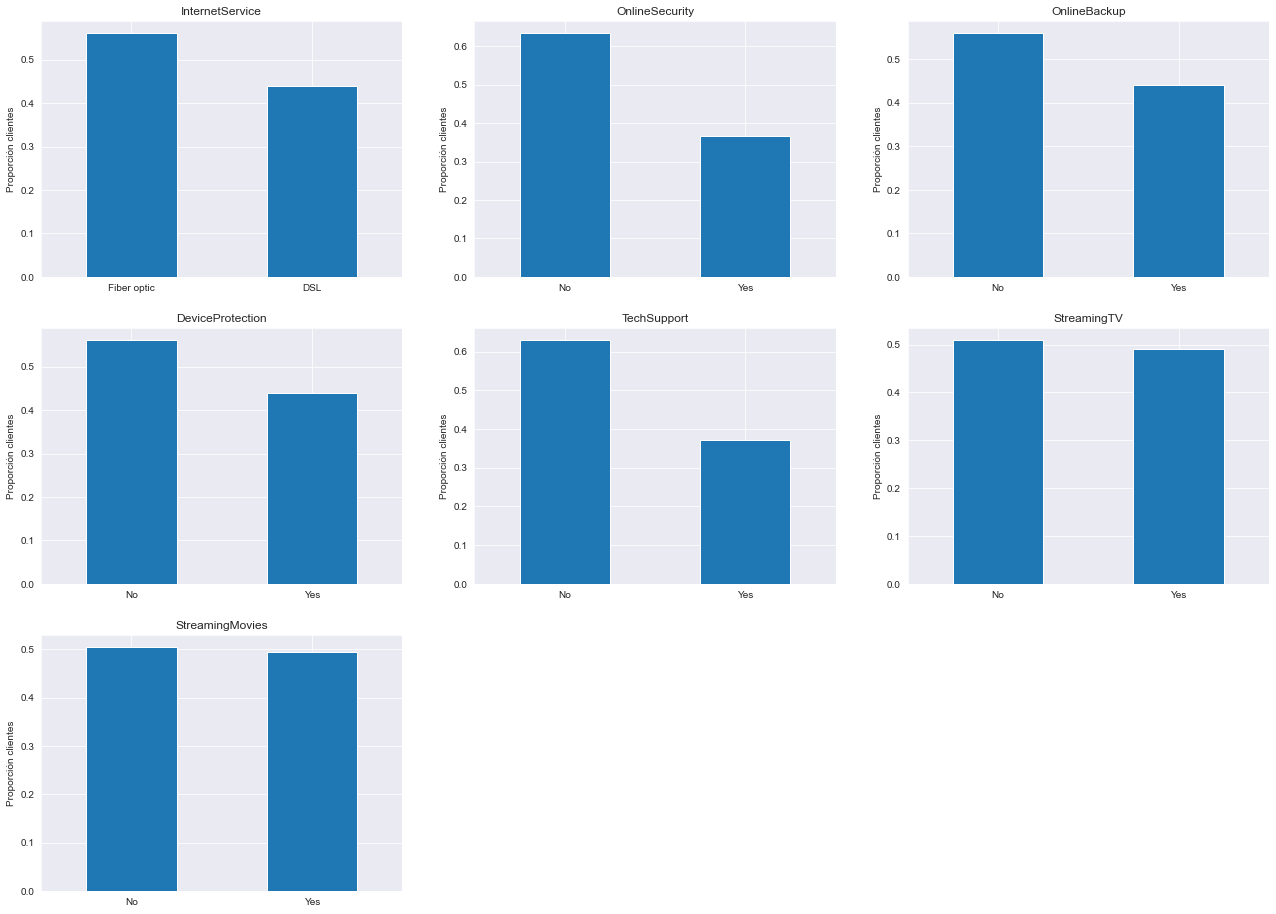

In [23]:
# Trazamos gráficos de barras para cada variable del dataset
fig = plt.subplots(figsize=(22, 16))

for n, col in enumerate(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                         'TechSupport', 'StreamingTV', 'StreamingMovies']):
    ax = plt.subplot(3, 3, n + 1)
    ax.set_ylabel('Proporción clientes')
    internet[col].value_counts(normalize=True).plot(kind='bar', ax=ax, title=col, rot=0)

plt.show()

Más del 50% de clientes prefieren contratar servicios de fibra óptica sobre DSL (línea de abonado digital). Para servicios como seguridad en línea, backup de datos, software antivirus y soporte técnico, se registra un mayor número de usuarios que no hacen uso de estos servicios, por lo que será necesario explorar más a detalle si estos factores pueden llegar a influir en la cancelación de cuentas de clientes. 

En cuanto a servicios de streaming de TV y directorio de películas, si bien existe una mayor proporción de clientes que no utilizan estos servicios, la diferencia no es tan significativa. 

**Observaciones Generales**

- No se requiere imputar ausentes o cambiar el tipo de datos.
- Se debe considerar que solo 5517 clientes contrataron los servicios de internet de la compañía.
- Se deberá analizar más a detalle si el uso o no de estos servicios pueden llegar a influir en la decisión de cancelar una cuenta. 

### Dataset `phone`

In [24]:
# Número de filas y columnas 
phone.shape

(6361, 2)

In [25]:
# Imprimimos las cinco primeras filas del dataset
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [26]:
# Mostramos la información general de nuestros datos
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [27]:
print(f'''Número de valores ausentes:
{phone.isna().sum()}''')

Número de valores ausentes:
customerID       0
MultipleLines    0
dtype: int64


In [28]:
print(f'Número de valores duplicados: {phone.duplicated().sum()}')

Número de valores duplicados: 0


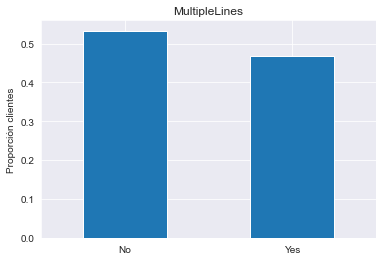

In [29]:
#Trazamos un gráfico de barras 
phone['MultipleLines'].value_counts(normalize=True).plot(kind='bar', rot=0, title='MultipleLines')
plt.ylabel('Proporción clientes')
plt.show()

Nuestro dataset `phone` registra un total de 6361 filas y 2 columnas, por lo que solo 6361 clientes hacen uso de los servicios de telefonía fija. De estos, existe una mayor proporción de usuarios que no contratan la conexión de varias líneas de manera simultánea. 

No se registran valores ausentes ni duplicados y el tipo de datos es el correcto. 

**Observaciones Generales**

- No se requiere preprocesar datos, pero se debe considerar que solo 6361 hacen uso de los servicios de telefonía fija.

## Plan de Resolución

### Preprocesamiento de datos

En base al análisis exploratorio inicial de nuestros datos se realizará el siguiente preprocesamiento:
1. Se construirá un solo dataset que contendrá la información personal, el tipo de contrato, tipo de servicio de internet y comunicación por teléfono fijo para cada uno de los 7043 usuarios de Interconnect.
2. A este nuevo dataset se cambiará el título de columnas siguiendo las normas del buen estilo en programación, y se cambiará el tipo de dato de las columnas `BeginDate` y `TotalCharges`.
3. A partir de la columna `EndDate`, que contiene nuestro objetivo a predecir, se obtendrá una nueva variable cualitativa que contendrá dos categorías: 0-no canceló su contrato, 1-canceló su contrato. 
4. Se generarán nuevas columnas con información relacionada a los años y meses de suscripción por usuario. Para esto será necesario cambiar el tipo de dato de la columna fecha de finalización del contrato a datetime y también reemplazar las cuentas no suspendidas por una fecha determinada. 
5. Se verificará si en este nuevo dataset se generaron valores ausentes, considerando que no todos los usuarios se registran en los datasets de internet y phone. Estos serán imputados dependiendo del tipo de dato y de si existe un patrón subyacente.


### Análisis Exploratorio de Datos (EDA)

Una vez preprocesados los datos, procederemos a analizar y encontrar patrones en los datos:
1. Estableceremos cómo se relaciona el género, jubilación, tener pareja o dependientes con la tasa de cancelación de clientes. 
2. Cómo varía la cancelación de cuentas dependiendo del tipo de servicio contratado (internet o teléfono fijo).
3. Agruparemos la tasa de cancelación de acuerdo a los diferentes servicios brindados por la empresa y observaremos si existe algún tipo de relación. 
4. Compararemos el cargo mensual y total entre clientes que han cancelado o no sus cuentas para establecer si este factor puede influir en la decisión de abandono de servicios. 
5. Determinar si el tiempo de permanencia de cada usuario se relaciona con la tasa de cancelación de cuentas y qué tipo de usuarios son los que generan más ingresos a la empresa. 

### Preparación de datos para entrenamiento

1. Se dividirá nuestro dataset correctamente preprocesado en conjuntos de entrenamiento y prueba en una proporción 80:20.
2. Se establecerán las características y el objetivo de cada conjunto de datos.
3. Se transformarán las características categóricas en numéricas por codificación de etiquetas o One-Hot Encoding dependiendo del tipo de modelo de aprendizaje supervisado. 
4. Se estandarizarán o escalarán las características numéricas.
5. Se analizará el desbalance de clases en la variable objetivo para determinar si se requiere un ajuste. 

### Entrenamiento modelos

1. Se construirán seis modelos de aprendizaje automático que predecirán la cancelación o no de cuentas: 
    - Regresión Logística
    - Árbol de Decisión
    - Bosque Aleatorio
    - LGBMClassifier
    - CatBoostClassifier
    - XGBClassifier.
2. Se utilizará como métrica de evaluación de calidad del modelo AUC-ROC y como métrica adicional la exactitud. 
2. Se realizará un prueba de cordura con un modelo DummyClassifier.
2. Para cada modelo se realizará un ajuste de hiperparámetros, escogiendo aquel modelo que obtenga el valor AUC-ROC y exactitud más altos en el conjunto de prueba.  

### Conclusión

1. En base a los resultados obtenidos se generará conclusiones sobre el mejor modelo obtenido. 


## Preguntas Aclaratorias

1. ¿A qué hace referencia la variable `TotalCharge`, al cargo total por año, por meses o por tiempo total de suscripción?
2. Dentro de la planificación se busca establecer el número de meses y años de suscripción por usuario, ¿qué fecha se toma como referencia para aquellos usuarios cuyos contratos no han sido cancelados?
3. En la sección de Análisis Exploratorio de Datos ¿qué información o patrones se espera que sean analizados y visualizados para que la tarea sea considerada como aprobada?
4. Se planifica entrenar seis modelos de clasificación, tanto tradicionales como de potenciación de gradiente ¿qué otros modelos se recomienda entrenar para obtener una mejor métrica?
5. En caso de desbalance de clases, ¿se debería hacer uso de técnicas de submuestreo o sobremuestreo?
